# Technical Financial analysis for s&p500


In [1]:
#import required libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

In [2]:
#use an user-agent header so that wikipedia doesn't block the call
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
html = StringIO(response.text)

tables = pd.read_html(html)

# The S&P 500 constituents table is the FIRST real table, usually index 1
df_tickers = tables[1]

df_tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
# yfinance prefers - over . on tickers names so lets clean that before download
ticker_list = df_tickers['Symbol'].str.replace('.', '-', regex=False).tolist()
ticker_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APP',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


# Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between start date and end date https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [4]:
from datetime import datetime
start_date = '2024-11-01'
end_date = '2025-11-01'

start_date = datetime.strptime(start_date, '%Y-%m-%d')
end_date = datetime.strptime(end_date, '%Y-%m-%d')

In [ ]:
# Download all finantial information for all ticker in one call
raw = yf.download(
    tickers=" ".join(ticker_list),
    start=start_date,
    end=end_date,
    auto_adjust=True,
    group_by='ticker'
)

# Extract only the close prices
close_prices = raw.xs('Close', axis=1, level=1)

#close_prices.head()

[*********************100%***********************]  503 of 503 completed


Ticker,GNRC,DELL,INVH,GEV,NDAQ,NFLX,HII,MHK,NOW,SPG,...,RVTY,ED,UHS,HSY,EFX,TT,L,NXPI,BKR,IBM
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-01,168.910004,128.532074,30.283085,300.378601,73.417313,75.610001,184.458115,134.279999,943.409973,159.724625,...,120.700310,95.837311,204.381241,172.177399,261.907074,372.689453,79.045692,234.169250,36.852196,201.417465
2024-11-04,170.740005,127.530327,30.659214,294.761871,73.901360,75.551003,186.222504,136.750000,954.590027,163.972549,...,124.469696,95.022697,207.935959,171.927673,262.204224,373.521729,76.293510,232.510574,37.371105,199.550797
2024-11-05,181.809998,131.075821,31.112492,315.023895,75.215210,76.390999,188.367020,140.440002,971.039978,166.096497,...,125.606506,95.664810,211.261627,172.993805,267.097839,386.699371,78.168182,220.487518,37.772526,200.759781
2024-11-06,183.500000,135.878479,32.173363,335.505371,76.647591,78.021004,198.085602,147.600006,994.479980,165.353592,...,124.509583,94.840599,202.648682,169.833801,261.728760,388.254913,82.525826,227.092850,41.845459,206.591949
2024-11-07,186.710007,135.407043,32.115498,335.984253,77.230431,79.653999,192.831512,145.070007,1015.280029,167.391815,...,123.652008,93.518051,207.517731,166.020676,266.959106,392.277618,81.847740,231.745026,42.197918,206.678970


In [6]:
#sort by ticker names (columns) for readibility
close_prices.sort_index(axis=1, inplace=True)
close_prices.describe()

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\1890318885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.sort_index(axis=1, inplace=True)


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.569076,225.810811,191.879282,130.317581,126.469113,91.770988,306.290351,403.307359,220.920539,51.674292,...,26.979149,96.611897,69.688790,108.204209,128.387942,73.086400,142.856626,101.543206,323.103400,158.397552
std,12.990683,20.074988,19.022794,8.345498,7.690284,3.140164,44.857796,54.499963,18.999811,5.866266,...,2.207412,16.257122,4.579538,4.539527,11.084534,12.668445,8.370043,6.300807,50.873870,9.879516
min,98.882774,171.832413,159.415924,105.690002,109.606163,84.720001,232.559998,329.230011,163.208511,40.670536,...,23.000000,65.644135,61.841045,97.254478,102.248962,46.529999,121.481812,89.756950,213.539993,140.620377
25%,115.729570,209.571266,175.459377,124.915001,123.682297,89.602499,258.889999,357.317490,209.345985,47.043133,...,25.351177,84.333586,66.799274,104.757246,120.498964,62.265000,137.047741,96.455641,292.117493,150.113762
50%,124.025948,226.949989,188.099586,130.529999,129.479996,91.514999,306.273209,387.070007,220.941422,49.787310,...,26.124765,90.441204,68.594719,107.818508,126.626099,74.980000,144.528046,102.291660,312.550003,158.313400
75%,136.560783,241.093578,206.212772,136.267506,132.144096,93.419998,348.800125,438.600006,236.611732,55.652081,...,29.137983,109.543884,71.815058,111.824619,139.799126,83.027500,148.004997,106.746319,379.022499,165.553074
max,151.651962,271.137146,242.630859,161.419998,138.334625,100.739998,394.312805,552.960022,254.623001,63.673424,...,31.520311,133.063889,81.849998,117.613434,152.949997,98.919998,160.955292,112.611595,421.109985,179.563766


# Identify Golden and Death crosses
Getting Moving averages 50 and 200 days, using this numbers help stablish trending behaviour for both short and long term as they fit into 2/10 months relationship.

A golden cross occurs when a short-term moving average (in this case the 50-day MA) crosses above a long-term moving average (in this case the 200-day MA), and traders usually interpret it as a confirmation that a strong upward trend may be starting, causing an increased buying pressure.
The death cross is the opposite term of the golden cross, it occurs when the short-term MA crosses below the long-term MA — typically meaning a bearish signal and a warning for traders to sell to avoid more significant lost.

In [7]:
# Compute group-wise rolling averages
sma_50  = close_prices.rolling(window=50).mean()
sma_200 = close_prices.rolling(window=200).mean()

In [8]:
# Function to plot MA lines for a specific ticker
def plot_moving_averages(symbol):
    plt.figure(figsize=(12,6))
    plt.plot(close_prices[symbol], label="Close")
    plt.plot(sma_50[symbol], label="SMA50")
    plt.plot(sma_200[symbol], label="SMA200")
    plt.legend()
    plt.title(f"{symbol} - Moving Averages")
    plt.show()


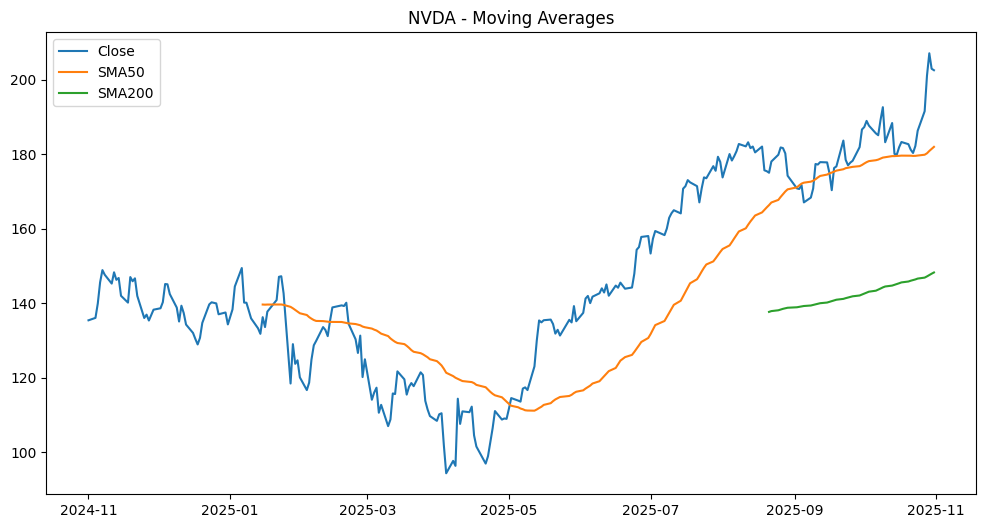

In [9]:
# quick view of the MA's for a single ticker
example_ticker = 'NVDA'
plot_moving_averages(example_ticker)

In [ ]:
# Function to detect the golden and death crosses and return only the crosses
def detect_crosses(sma_50, sma_200, lookback=14):
    """
    Detect golden and death crosses for each ticker within the last `lookback` days.
    
    Returns: Dictionary with tickers as keys and a list of tuples [(date, cross),...] as values
    """

    # Keep last N+1 rows for comparison
    sma_50_recent  = sma_50.tail(lookback + 1)
    sma_200_recent = sma_200.tail(lookback + 1)

    result = {}

    for ticker in sma_50.columns:
        if ticker not in sma_200.columns:
            continue

        s50 = sma_50_recent[ticker]
        s200 = sma_200_recent[ticker]

        # Boolean series for crosses
        golden_cross = (s50 > s200) & (s50.shift(1) <= s200.shift(1))
        death_cross  = (s50 < s200) & (s50.shift(1) >= s200.shift(1))

        events = []

        # Add golden crosses
        for dt in golden_cross[golden_cross].index:
            events.append((dt, "golden"))

        # Add death crosses
        for dt in death_cross[death_cross].index:
            events.append((dt, "death"))

        # Only include tickers with events
        if events:
            # Sort by date (important!)
            events.sort(key=lambda x: x[0])
            result[ticker] = events

    return result

In [11]:
# compute the crosses
cross_signals = detect_crosses(sma_50, sma_200, lookback=14)

cross_signals

{'AIG': [(Timestamp('2025-10-22 00:00:00'), 'death')],
 'AMGN': [(Timestamp('2025-10-29 00:00:00'), 'death')],
 'BLDR': [(Timestamp('2025-10-31 00:00:00'), 'death')],
 'BRK-B': [(Timestamp('2025-10-21 00:00:00'), 'golden'),
  (Timestamp('2025-10-29 00:00:00'), 'death')],
 'BSX': [(Timestamp('2025-10-16 00:00:00'), 'death')],
 'CCI': [(Timestamp('2025-10-22 00:00:00'), 'death')],
 'COP': [(Timestamp('2025-10-28 00:00:00'), 'death')],
 'CTAS': [(Timestamp('2025-10-14 00:00:00'), 'death')],
 'DHR': [(Timestamp('2025-10-28 00:00:00'), 'golden')],
 'DOC': [(Timestamp('2025-10-22 00:00:00'), 'golden')],
 'DRI': [(Timestamp('2025-10-17 00:00:00'), 'death')],
 'EG': [(Timestamp('2025-10-21 00:00:00'), 'golden'),
  (Timestamp('2025-10-31 00:00:00'), 'death')],
 'EQT': [(Timestamp('2025-10-21 00:00:00'), 'golden')],
 'FDX': [(Timestamp('2025-10-27 00:00:00'), 'golden')],
 'HAL': [(Timestamp('2025-10-23 00:00:00'), 'golden')],
 'HPQ': [(Timestamp('2025-10-17 00:00:00'), 'golden')],
 'ICE': [(Time

In [13]:
# Function to plot a specific ticker and its signal by type
def plot_ticker_signal(
    symbol,
    df,
    crosses_dict,
    cross_type=None,
    vol_df=None,
    last_n_days=14
):
    """
    Plot MA50, MA200 and cross signals for a specific ticker.
    Optionally adds volatility to the title.
    """

    if symbol not in df['Close'].columns:
        print(f"{symbol} data not found.")
        return

    # Slice last N days
    price_data = df['Close'][symbol].last(f"{last_n_days}D").to_frame(name="Close")
    price_data["MA50"] = df["MA50"][symbol].last(f"{last_n_days}D")
    price_data["MA200"] = df["MA200"][symbol].last(f"{last_n_days}D")

    # Title (with optional volatility)
    vol_text = ""
    if vol_df is not None and symbol in vol_df.index:
        vol_text = f" | Volatility: {vol_df.loc[symbol, 'Volatility']:.4f}"

    plt.figure(figsize=(12,6))
    plt.plot(price_data.index, price_data["Close"], label="Close")
    plt.plot(price_data.index, price_data["MA50"], label="MA50")
    plt.plot(price_data.index, price_data["MA200"], label="MA200")

    # Plot cross points if exist
    if cross_type:
        for date, ctype in crosses_dict[symbol]:
            if ctype == cross_type and date in price_data.index:
                color = "green" if ctype == "golden" else "red"
                plt.scatter(date, price_data.loc[date, "Close"], color=color, s=120, marker="X")
                plt.text(date, price_data.loc[date, "Close"], ctype, fontsize=10)

    plt.title(f"{symbol} – {cross_type} crosses (last {last_n_days} days){vol_text}")
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
#merge close prices, sma_50 and 200 into a single df
prices_df = pd.concat(
    {
        "Close": close_prices,
        "MA50": sma_50,
        "MA200": sma_200
    },
    axis=1
)

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\2140625575.py:20: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][symbol].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\2140625575.py:21: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][symbol].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\2140625575.py:22: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][symbol].last(f"{last_n_days}D")


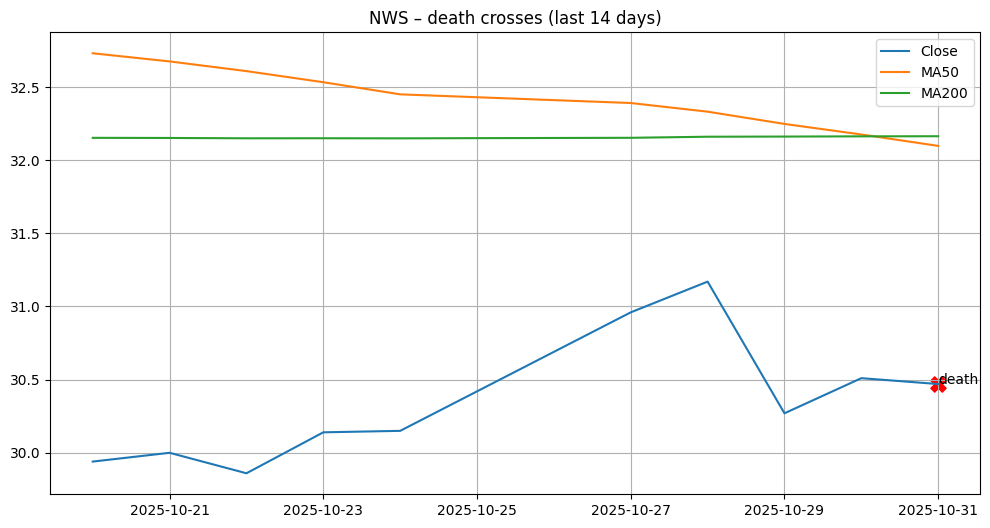

In [15]:
#view the event for a ticker
plot_ticker_signal('NWS', prices_df, cross_signals, 'death')

In [16]:
def plot_first_n_crosses(
    crosses_dict, 
    df, 
    cross_type="golden", 
    n=3, 
    vol_df=None,
    last_n_days=14
):
    """
    Plot the first N golden/death crosses found across all tickers.
    Optionally print volatility in the title.
    """

    # Collect first n crosses across the dataset
    collected = []
    for ticker, crosses in crosses_dict.items():
        for date, ctype in crosses:
            if ctype == cross_type:
                collected.append((ticker, date))
                if len(collected) >= n:
                    break
        if len(collected) >= n:
            break

    if not collected:
        print(f"No {cross_type} crosses found.")
        return

    for ticker, date in collected:

        price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
        price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
        price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")

        vol_text = ""
        if vol_df is not None:
            vol_text = f" | Volatility: {vol_df.loc[ticker, 'AnnualizedVolatility']:.4f}"

        plt.figure(figsize=(12,6))
        plt.plot(price_data.index, price_data["Close"], label="Close")
        plt.plot(price_data.index, price_data["MA50"],  label="MA50")
        plt.plot(price_data.index, price_data["MA200"], label="MA200")

        # Mark the cross point
        if date in price_data.index:
            color = "green" if cross_type == "golden" else "red"
            plt.scatter(date, price_data.loc[date, "Close"], color=color, s=120, marker="X")
            plt.text(date, price_data.loc[date, "Close"], cross_type, fontsize=10)

        plt.title(f"{ticker} – {cross_type} cross at {date.date()} (last {last_n_days} days){vol_text}")
        plt.legend()
        plt.grid()
        plt.show()

## Golden Crosses top n

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


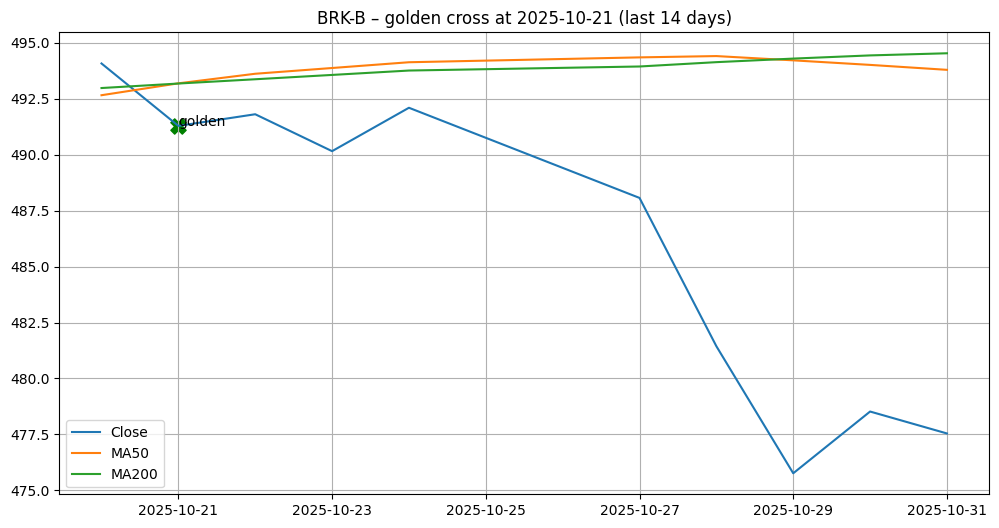

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


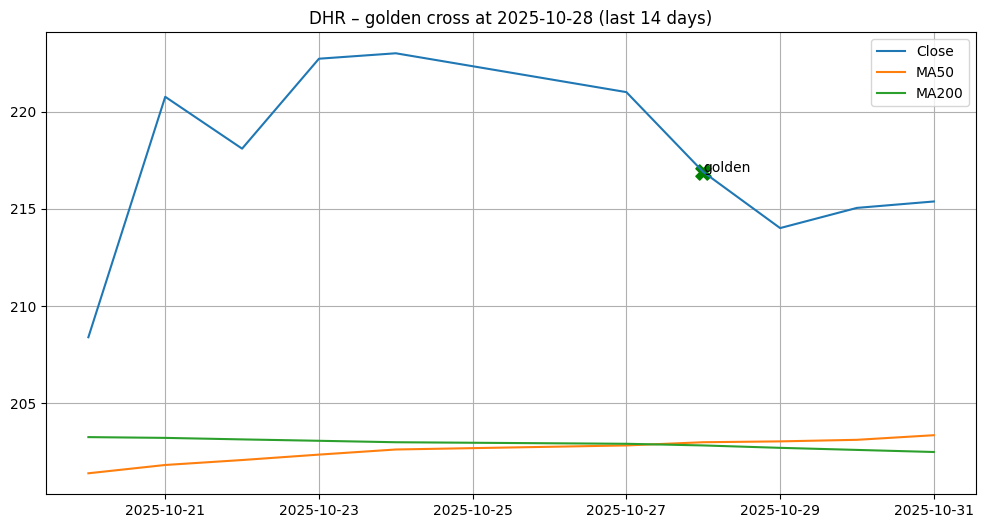

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


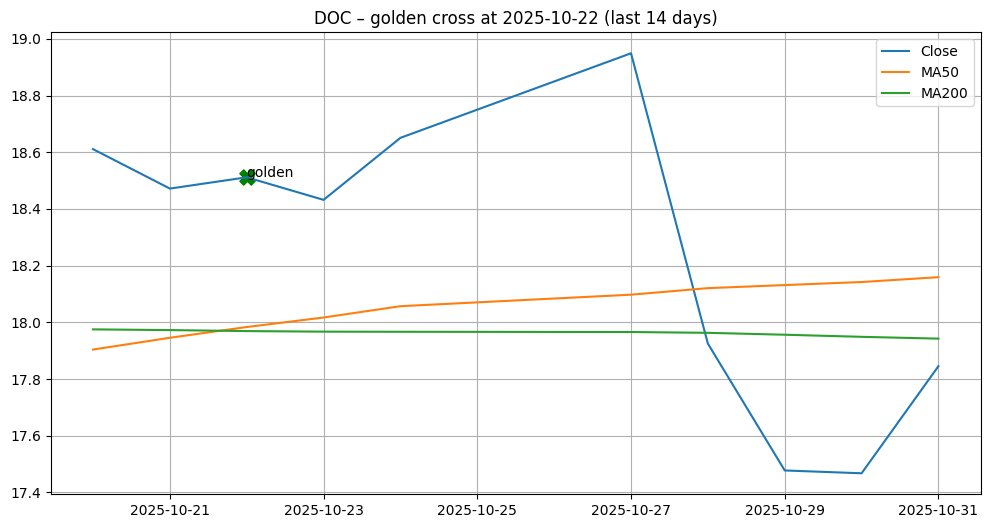

In [17]:
# For first 3 golden crosses
plot_first_n_crosses(cross_signals,prices_df,'golden',3)

## Death Crosses top n

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


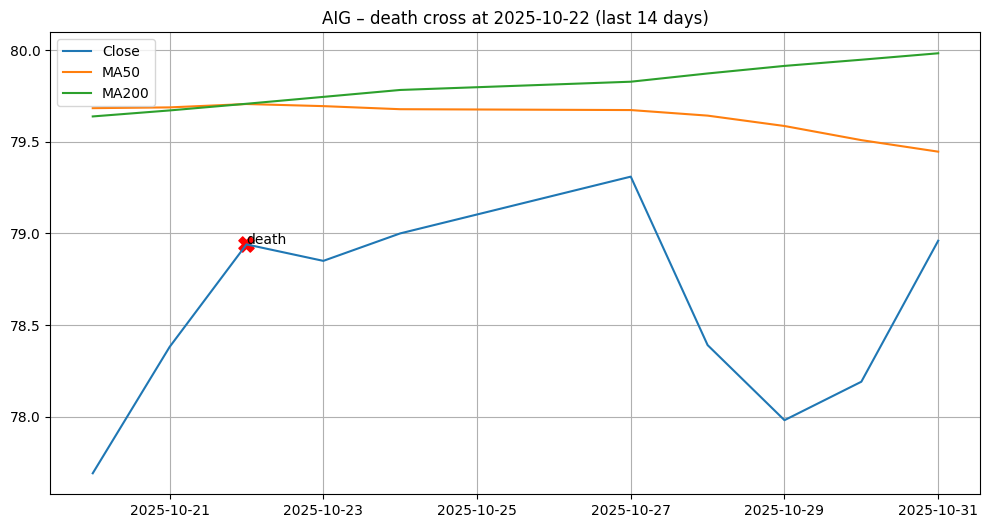

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


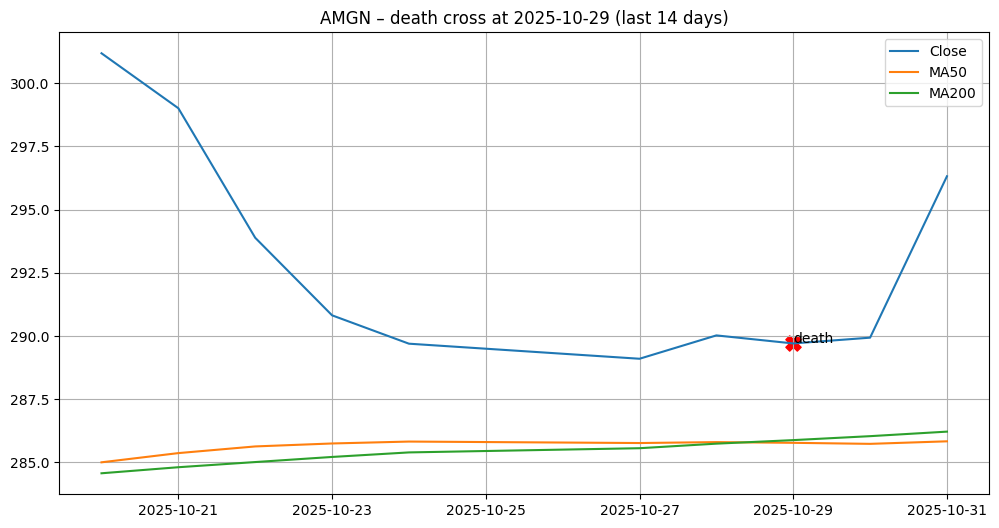

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


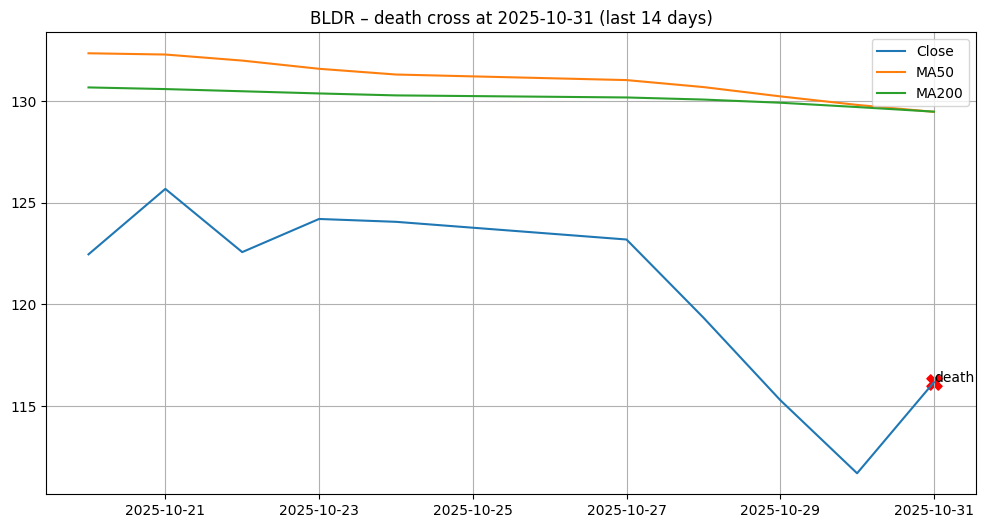

In [18]:
# For first 3 death crosses
plot_first_n_crosses(cross_signals,prices_df,'death',3)

# Volatibility of stocks

In [19]:
def compute_recent_volatility(close_prices, cross_dict, lookback=14, annualize=True):
    """
    Computes volatility for tickers with Golden/Death signals in the last `lookback` days.

    Returns:
        A DataFrame with daily volatility and (optionally) annualized volatility.
    """

    vol_data = []

    for ticker in cross_dict.keys():  # only tickers with signals
        prices = close_prices[ticker].dropna().tail(lookback + 1)

        if len(prices) < 2:
            continue

        # Daily returns
        returns = prices.pct_change().dropna()

        # Standard deviation of daily returns
        daily_vol = returns.std()

        if annualize:
            ann_vol = daily_vol * (252 ** 0.5)
        else:
            ann_vol = None

        vol_data.append({
            "Ticker": ticker,
            "DailyVolatility": daily_vol,
            "AnnualizedVolatility": ann_vol
        })

    return pd.DataFrame(vol_data).sort_values("AnnualizedVolatility", ascending=False)

In [20]:
vol_df = compute_recent_volatility(close_prices, cross_signals)
vol_df.set_index("Ticker", inplace=True)
vol_df

,DailyVolatility,AnnualizedVolatility
Ticker,,
HAL,0.036624,0.581383
EG,0.033768,0.536046
MSCI,0.029020,0.460675
BLDR,0.028840,0.457820
EQT,0.025893,0.411041
TXN,0.020944,0.332468
HPQ,0.020668,0.328102
TECH,0.020073,0.318645
DHR,0.020055,0.318359


C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


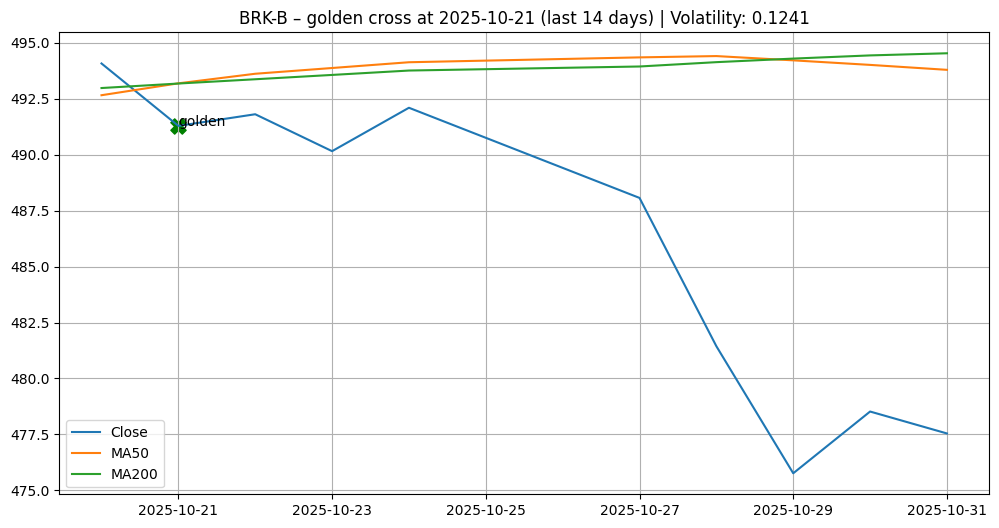

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


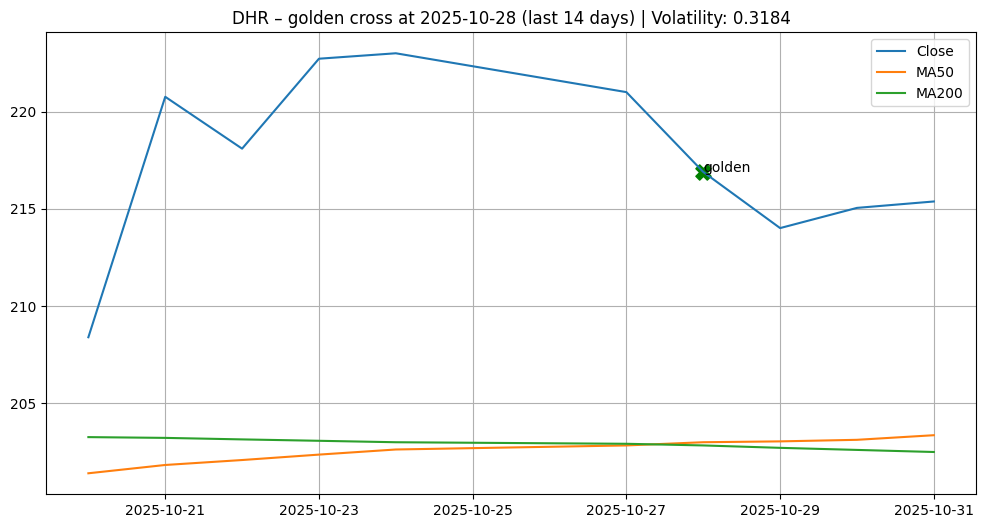

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


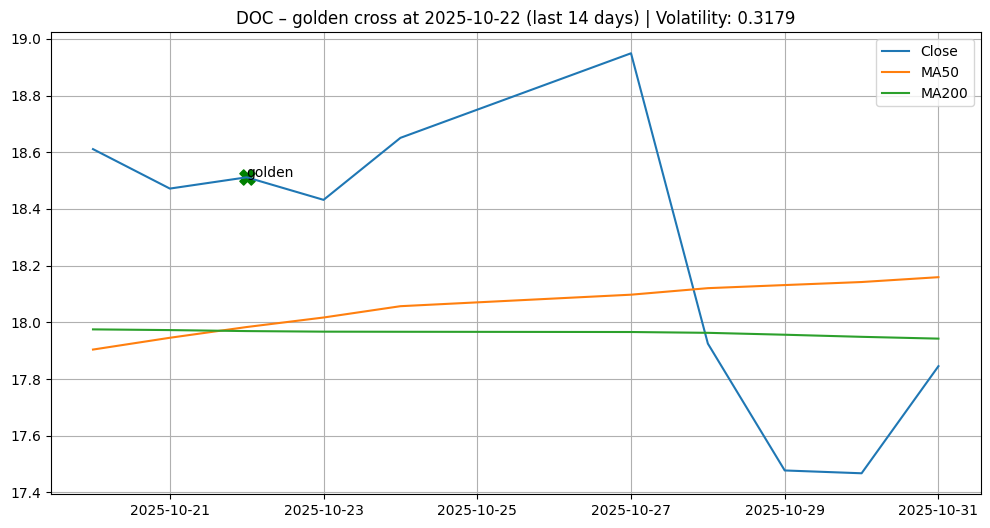

In [21]:
plot_first_n_crosses(cross_signals, prices_df, 'golden', 3, vol_df=vol_df)

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


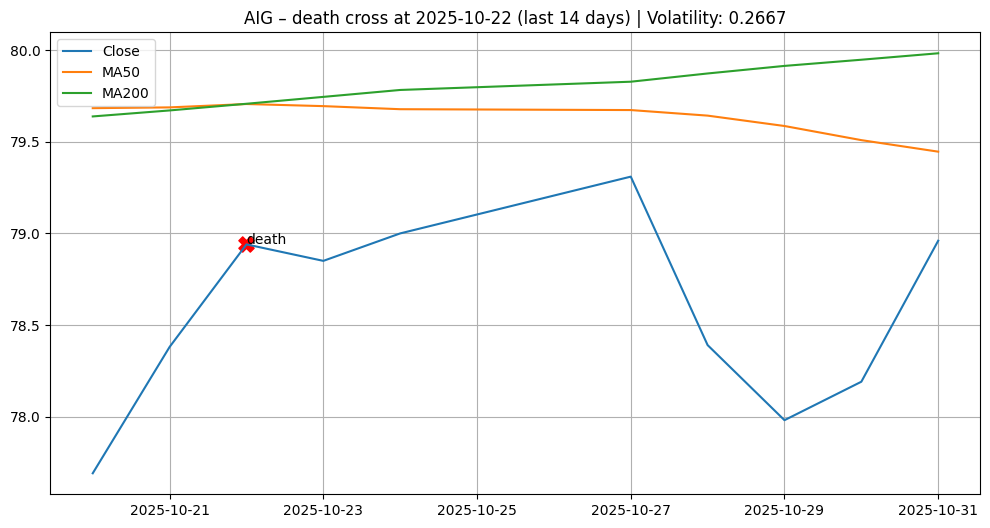

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


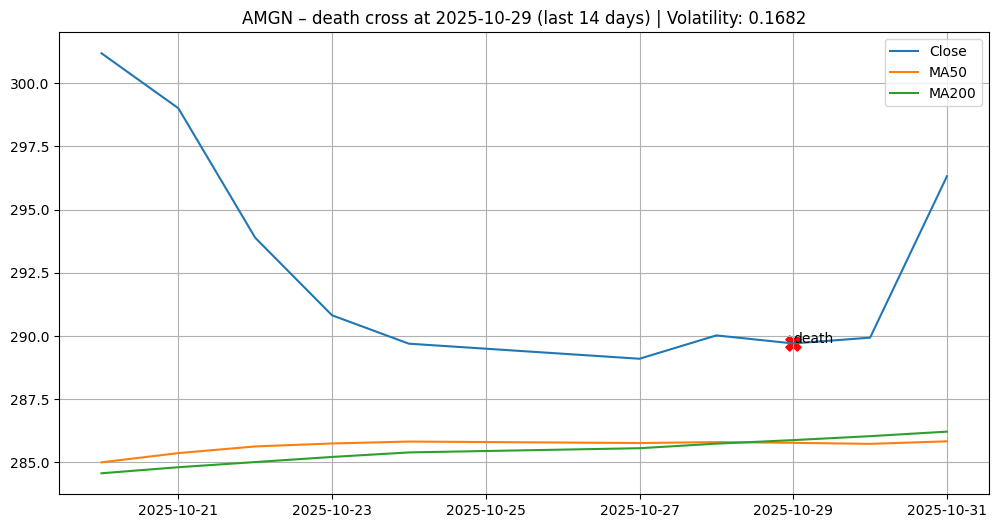

C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data = df['Close'][ticker].last(f"{last_n_days}D").to_frame(name="Close")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA50"] = df["MA50"][ticker].last(f"{last_n_days}D")
C:\Users\giank\AppData\Local\Temp\ipykernel_35604\3270517039.py:33: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  price_data["MA200"] = df["MA200"][ticker].last(f"{last_n_days}D")


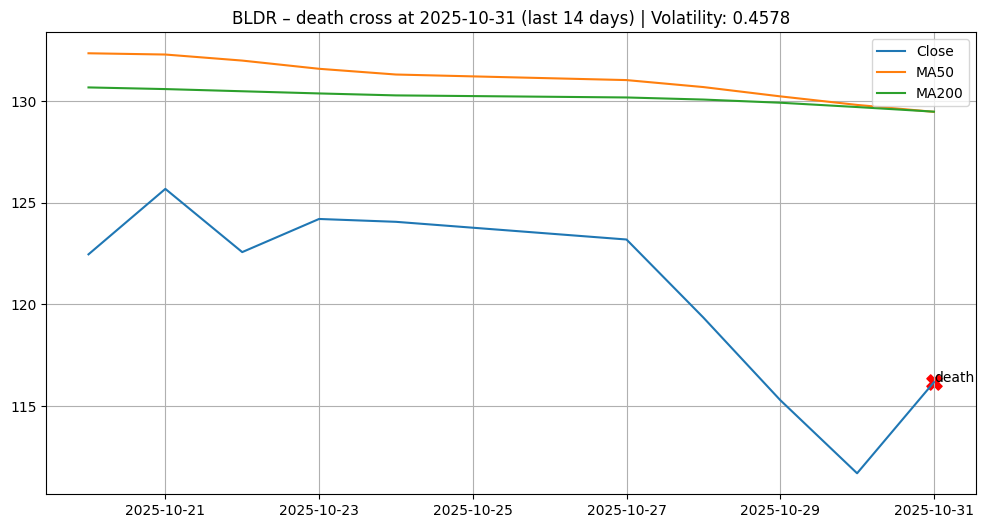

In [22]:
plot_first_n_crosses(cross_signals, prices_df, 'death', 3, vol_df=vol_df)

# Conclusions for this analysis

Using moving averages for detecting a possible growing (golden cross) or drowning (death cross) behaviour is good if targeted on a well known market.
Visualizing and properly understanding the volatility helps to preview the risk and reward behind the investment.

 - Applying technical analysis to many not well known markets will surely fail as some conditions might not be equal for other products.
 - There is the possibility that a false signal happen due to long ranges or low volume markets
 - Ignoring company health or valuation is also a very dumb mistake, technical analysis DOES NOT contemplate that.